# KUIS 2 MACHINE LEARNING

### Nama: Magfiroh Indah Karisma
### NIM: 2141720180
### TI - 3F | 17

## Import Library

In [13]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import zipfile

#### PENJELASAN

- `import tensorflow as tf`: Mengimpor TensorFlow, sebuah framework yang digunakan untuk pembelajaran mesin dan pembuatan model neural network.
- `import numpy as np`: Mengimpor NumPy, pustaka yang digunakan untuk komputasi numerik di Python, terutama untuk array multidimensi.
- `import pandas as pd`: Mengimpor Pandas, pustaka yang menyediakan struktur data dan alat analisis data yang mudah digunakan.
- `import matplotlib.pyplot as plt`: Mengimpor Matplotlib, pustaka untuk visualisasi data, sering digunakan untuk membuat grafik dan plot.
- `import seaborn as sns`: Mengimpor Seaborn, pustaka lain untuk visualisasi data yang dibangun di atas Matplotlib, dengan fokus pada grafik statistik yang menarik.
- `from sklearn.preprocessing import LabelBinarizer`: Mengimpor LabelBinarizer dari pustaka scikit-learn (sklearn), digunakan untuk mengubah fitur kategorikal menjadi bentuk yang dapat diproses oleh algoritma machine learning.
- `from sklearn.model_selection import train_test_split`: Mengimpor train_test_split dari sklearn, yang berguna untuk membagi data menjadi set pelatihan dan pengujian.
- `from sklearn.metrics import classification_report`: Mengimpor classification_report dari sklearn, yang memberikan ringkasan performa model klasifikasi.
- `import zipfile`: Mengimpor modul zipfile untuk menangani file arsip ZIP di Python.

## Load Dataset
### Load MNIST

In [14]:
from tensorflow.keras.datasets import mnist

Kode tersebut mengimpor dataset MNIST dari TensorFlow. Dataset ini berisi gambar-gambar angka tulisan tangan yang umumnya digunakan untuk melatih model dalam mengenali angka.

In [15]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


Baris kode tersebut memuat dataset MNIST dari TensorFlow ke dalam empat variabel:

- `train_data`: Berisi gambar-gambar angka tulisan tangan yang digunakan untuk melatih model.
- `train_labels`: Menyimpan label atau kelas yang sesuai dengan gambar-gambar pelatihan dalam `train_data`.
- `test_data`: Berisi gambar-gambar yang digunakan untuk menguji performa model.
- `test_labels`: Menyimpan label atau kelas yang sesuai dengan gambar-gambar pengujian dalam `test_data`.

Data latih (`train_data` dan `train_labels`) digunakan untuk melatih model, sedangkan data uji (`test_data` dan `test_labels`) digunakan untuk menguji kinerja model pada data baru yang tidak pernah dilihat sebelumnya.

In [16]:
# Check shape data
(train_data.shape, test_data.shape)

((60000, 28, 28), (10000, 28, 28))

Kode tersebut digunakan untuk memeriksa bentuk atau dimensi dari data latih (`train_data`) dan data uji (`test_data`) dalam dataset MNIST. Ini memberikan informasi tentang jumlah sampel data dan dimensi dari setiap sampel. Dalam hal ini, kode tersebut akan memberikan tuple yang berisi bentuk data (`shape`) dari `train_data` dan `test_data`.

In [17]:
# Check shape labels
(train_labels.shape, test_labels.shape)

((60000,), (10000,))

Baris kode ini bertujuan untuk memeriksa dimensi atau bentuk dari label-label yang terkait dengan data latih (`train_labels`) dan data uji (`test_labels`) dalam dataset MNIST. Ini memberikan informasi tentang jumlah label dalam setiap set data.


In [18]:
# Check each data shape --> should be 28*28
train_data[0].shape

(28, 28)

Kode ini digunakan untuk memeriksa dimensi atau bentuk dari gambar pertama dalam data latih (`train_data`). Dalam konteks dataset MNIST, yang memiliki gambar berukuran 28x28 piksel, mengonfirmasi bahwa dimensi gambar pertama adalah 28x28 akan menunjukkan bahwa pengambilan data dilakukan dengan benar.

Misalnya, jika hasilnya adalah `(28, 28)`, itu menegaskan bahwa gambar pertama dalam data latih memiliki dimensi 28x28 piksel.

In [19]:
# Check the label
train_labels.shape

(60000,)

Kode `train_labels.shape` digunakan untuk memeriksa jumlah label yang terkait dengan data latih dalam dataset MNIST. Misalnya, jika hasilnya adalah `(60000,)`, itu berarti terdapat 60.000 label yang sesuai dengan data latih. Bentuk `(60000,)` menunjukkan bahwa label-label ini membentuk larik satu dimensi yang sejajar dengan jumlah data dalam set latihan.

## Combine Train and Test Data

In [20]:
digits_data = np.vstack([train_data, test_data])
digits_labels = np.hstack([train_labels, test_labels])

Kode ini menggabungkan data latih (`train_data`) dan data uji (`test_data`) dari dataset MNIST ke dalam satu variabel `digits_data`. Hal yang serupa dilakukan untuk label-label yang sesuai dengan data tersebut, yang digabungkan ke dalam variabel `digits_labels`.

- `np.vstack([train_data, test_data])`: Fungsi `vstack` dari NumPy digunakan untuk menggabungkan data dalam arah vertikal (menambahkan baris), sehingga menghasilkan satu set data yang berisi baik data latih maupun data uji dari dataset MNIST.
  
- `np.hstack([train_labels, test_labels])`: Fungsi `hstack` dari NumPy menggabungkan label-label (kelas-kelas) dari data latih dan data uji, sehingga menghasilkan satu set label yang mencakup label dari kedua set data.

Ini memungkinkan untuk menggabungkan data dan label dari kedua set (latih dan uji) ke dalam satu set tunggal untuk penggunaan lebih lanjut dalam pemrosesan dan analisis.

In [21]:
# Check data shape
digits_data.shape

(70000, 28, 28)

Perintah `digits_data.shape` digunakan untuk memeriksa dimensi atau bentuk dari variabel `digits_data`, yang berisi gabungan dari data latih dan data uji dari dataset MNIST.



In [22]:
# Check label shape
digits_labels.shape

(70000,)

Kode `digits_labels.shape` digunakan untuk memeriksa dimensi atau bentuk dari variabel `digits_labels`, yang berisi label-label yang telah digabungkan dari data latih dan data uji dalam dataset MNIST.



Text(0.5, 1.0, 'Class: 4')

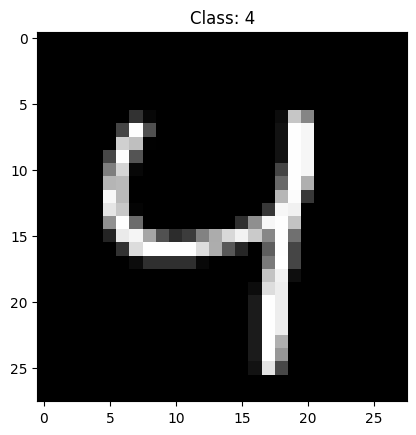

In [23]:
# Randomly checking the data
idx = np.random.randint(0, digits_data.shape[0])
plt.imshow(digits_data[idx], cmap='gray')
plt.title('Class: ' + str(digits_labels[idx]))

Kode ini bertujuan untuk secara acak memilih satu sampel dari `digits_data`, kemudian menampilkannya sebagai gambar menggunakan `plt.imshow()` dari Matplotlib dengan skema warna abu-abu (`cmap='gray'`). Selain itu, kode juga menampilkan judul gambar dengan kelas atau label yang sesuai, diambil dari `digits_labels`.

Ini membantu dalam memeriksa secara visual salah satu gambar dari dataset MNIST dan menampilkan label atau kelas yang dikaitkan dengan gambar tersebut.

<Axes: xlabel='Labels', ylabel='count'>

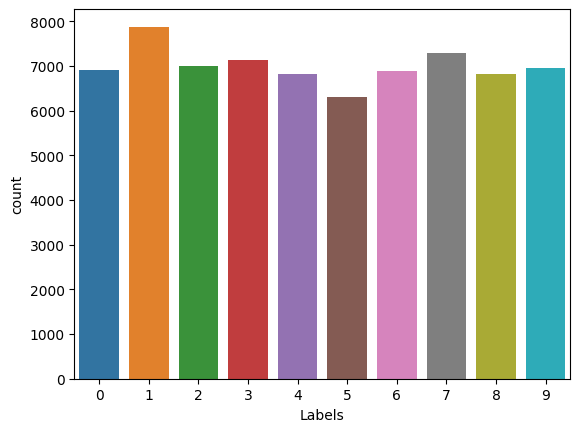

In [24]:
# Check data distribution
df_labels = pd.DataFrame(digits_labels, columns=['Labels'])
sns.countplot(df_labels, x='Labels')

Kode ini menggunakan Seaborn untuk membuat plot distribusi label dari dataset MNIST.

- `pd.DataFrame(digits_labels, columns=['Labels'])`: Membuat DataFrame Pandas dari `digits_labels` (label-label yang telah digabungkan) dengan satu kolom bernama 'Labels'.
- `sns.countplot(df_labels, x='Labels')`: Menggunakan Seaborn untuk membuat count plot dari label-label di DataFrame yang telah dibuat. Count plot ini menghitung jumlah kemunculan setiap label dalam dataset dan menampilkannya dalam bentuk grafik batang.

Plot ini memberikan gambaran tentang seberapa seimbang atau tidak seimbangnya distribusi label dalam dataset. Jika grafik menunjukkan bar yang memiliki tinggi yang serupa di semua kelas, itu menunjukkan distribusi yang seimbang. Namun, jika ada perbedaan tinggi yang signifikan di antara bar-bar tersebut, itu menandakan ketidakseimbangan dalam distribusi label.

## Load Kaggle A-Z

In [25]:
!wget https://iaexpert.academy/arquivos/alfabeto_A-Z.zip

--2023-12-05 10:44:30--  https://iaexpert.academy/arquivos/alfabeto_A-Z.zip
Resolving iaexpert.academy (iaexpert.academy)... 162.159.134.42
Connecting to iaexpert.academy (iaexpert.academy)|162.159.134.42|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 193643888 (185M) [application/zip]
Saving to: ‘alfabeto_A-Z.zip’

alfabeto_A-Z.zip    100%[===================>] 184.67M   197MB/s    in 0.9s    

2023-12-05 10:44:32 (197 MB/s) - ‘alfabeto_A-Z.zip’ saved [193643888/193643888]



Kode `!wget https://iaexpert.academy/arquivos/alfabeto_A-Z.zip` digunakan untuk mengunduh file ZIP yang berisi data alfabet A-Z dari URL yang diberikan.

In [26]:
# Extract zip file
zip_object = zipfile.ZipFile(file = 'alfabeto_A-Z.zip', mode = 'r')
zip_object.extractall('./')
zip_object.close()

Kode ini bertujuan untuk mengekstrak isi dari file ZIP yang telah diunduh ke dalam direktori kerja saat ini.

- `zipfile.ZipFile(file='alfabeto_A-Z.zip', mode='r')`: Membuat objek zip dengan mode 'r' (read) untuk membaca file ZIP bernama 'alfabeto_A-Z.zip'.
- `zip_object.extractall('./')`: Menggunakan method `extractall()` dari objek zip untuk mengekstrak semua isi file ZIP ke dalam direktori saat ini (`'./'`).
- `zip_object.close()`: Menutup objek zip setelah operasi pengekstrakan selesai.

Dengan cara ini, kode ini menghasilkan ekstraksi seluruh isi dari file ZIP 'alfabeto_A-Z.zip' ke dalam direktori kerja saat ini.

In [27]:
dataset_az = pd.read_csv('A_Z Handwritten Data.csv').astype('float32')
dataset_az

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372446,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372447,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372448,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Kode tersebut membaca file CSV yang disebut 'A_Z Handwritten Data.csv' dan memuatnya ke dalam suatu DataFrame menggunakan Pandas. Selain itu, dengan metode `astype('float32')`, semua nilai dalam DataFrame dikonversi menjadi tipe data float32.

Setelah file CSV dibaca dan dimuat ke dalam variabel `dataset_az`, jika Anda menjalankan kode `dataset_az`, itu akan menampilkan isi dari DataFrame tersebut. DataFrame ini mungkin berisi data dari kumpulan tulisan tangan alfabet A-Z.

In [28]:
# Get pixel data only
alphabet_data = dataset_az.drop('0', axis=1)
# Get labels only
alphabet_labels = dataset_az['0']

Kode tersebut melakukan pemisahan data dari DataFrame `dataset_az` menjadi dua bagian:

1. `alphabet_data = dataset_az.drop('0', axis=1)`: Variabel `alphabet_data` berisi data piksel dari dataset tulisan tangan alfabet A-Z. Baris ini menghapus kolom dengan label '0' dari `dataset_az` menggunakan `drop()` dengan `axis=1` yang menyatakan penghapusan berdasarkan kolom. Ini menghasilkan variabel `alphabet_data` yang hanya berisi data piksel (tanpa kolom label).

2. `alphabet_labels = dataset_az['0']`: Variabel `alphabet_labels` berisi label atau kelas dari dataset tulisan tangan alfabet A-Z. Ini menyimpan kolom dengan label '0' dari `dataset_az`, sehingga `alphabet_labels` hanya berisi label untuk setiap sampel data.

In [29]:
# Check shape data
alphabet_data.shape, alphabet_labels.shape

((372450, 784), (372450,))

Kode `alphabet_data.shape` dan `alphabet_labels.shape` digunakan untuk memeriksa dimensi atau bentuk dari variabel `alphabet_data` (data piksel) dan `alphabet_labels` (label atau kelas) yang berasal dari dataset tulisan tangan alfabet A-Z.

Misalnya, jika hasilnya adalah `(jumlah_baris, jumlah_kolom)` untuk `alphabet_data` dan `(jumlah_data,)` untuk `alphabet_labels`, itu menunjukkan:

- `alphabet_data.shape` akan memberikan informasi tentang jumlah sampel dan jumlah fitur (piksel) dalam set data alfabet A-Z.
- `alphabet_labels.shape` akan memberikan informasi tentang jumlah label atau kelas yang sesuai dengan set data alfabet A-Z.

In [30]:
# Check shape labels
alphabet_labels.shape

(372450,)

Kode `alphabet_labels.shape` digunakan untuk memeriksa dimensi atau bentuk dari variabel `alphabet_labels`, yang berisi label atau kelas dari dataset tulisan tangan alfabet A-Z.

Jika hasilnya adalah `(jumlah_data,)`, itu menandakan bahwa terdapat jumlah label atau kelas yang sesuai dengan data dalam `alphabet_data`. Dalam hal ini, bentuk `(jumlah_data,)` menunjukkan bahwa `alphabet_labels` merupakan array satu dimensi yang memiliki jumlah elemen yang sama dengan jumlah data dalam `alphabet_data`.

In [31]:
# Reshape pixel data to 28*28
alphabet_data = np.reshape(alphabet_data.values, (alphabet_data.shape[0], 28, 28))
# Check the result by its shape
alphabet_data.shape

(372450, 28, 28)

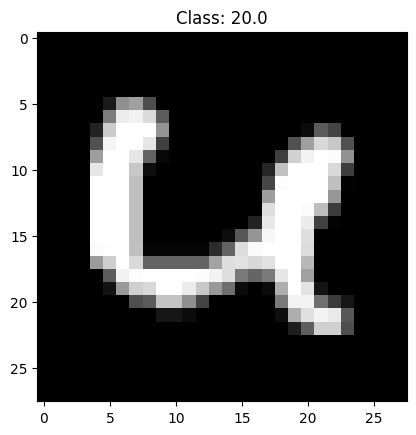

In [32]:
# Randomly checking A-Z dataset
index = np.random.randint(0, alphabet_data.shape[0])
plt.imshow(alphabet_data[index], cmap = 'gray')
plt.title('Class: ' + str(alphabet_labels[index]));

Kode `np.reshape(alphabet_data.values, (alphabet_data.shape[0], 28, 28))` digunakan untuk mengubah bentuk atau dimensi dari data piksel dalam variabel `alphabet_data` dari bentuk datanya yang awal menjadi format gambar yang sesuai, yaitu 28x28 piksel.

- `np.reshape(alphabet_data.values, (alphabet_data.shape[0], 28, 28))`: Menggunakan NumPy untuk mengubah bentuk data piksel dalam `alphabet_data` menjadi array tiga dimensi dengan ukuran (jumlah_data, 28, 28). Ini berarti setiap sampel data akan direpresentasikan sebagai gambar 28x28 piksel.

Kemudian, `alphabet_data.shape` digunakan untuk memeriksa bentuk dari `alphabet_data` setelah dilakukan perubahan bentuk. Jika hasilnya adalah `(jumlah_data, 28, 28)`, itu menunjukkan bahwa data piksel telah diubah dengan benar menjadi representasi 28x28 piksel untuk setiap sampel data.

<Axes: xlabel='Labels', ylabel='count'>

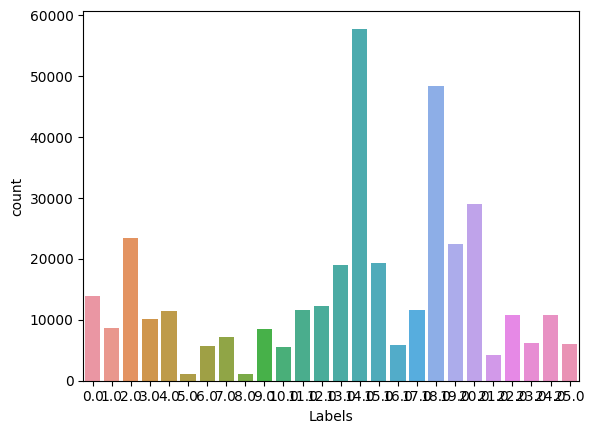

In [33]:
# Check data distribution
df_az_labels = pd.DataFrame({
    'Labels': alphabet_labels.values
})
sns.countplot(df_az_labels, x='Labels')

Kode tersebut menggunakan Seaborn untuk membuat plot distribusi label dari dataset tulisan tangan alfabet A-Z setelah diubah ke dalam DataFrame Pandas.

- `pd.DataFrame({'Labels': alphabet_labels.values})`: Membuat DataFrame Pandas baru dari label-label (`alphabet_labels`) dalam dataset tulisan tangan A-Z, dengan satu kolom bernama 'Labels'.
- `sns.countplot(df_az_labels, x='Labels')`: Menggunakan Seaborn untuk membuat count plot dari label-label di DataFrame yang telah dibuat. Count plot ini menghitung jumlah kemunculan setiap label dalam dataset dan menampilkan distribusi jumlah label dalam bentuk grafik batang.

Grafik ini memberikan gambaran visual tentang seberapa seimbang atau tidak seimbangnya distribusi label dalam dataset tulisan tangan alfabet A-Z. Jika grafik menunjukkan bar yang memiliki tinggi yang serupa di semua kelas, itu menunjukkan distribusi yang seimbang. Namun, jika ada perbedaan yang signifikan dalam tinggi bar-bar tersebut, itu menandakan ketidakseimbangan dalam distribusi label.

## Combine Dataset (MNIST + Kaggel A-Z)

In [34]:
# Check unique value from digits_labels
np.unique(digits_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

Kode `np.unique(digits_labels)` digunakan untuk mengecek nilai unik yang terdapat dalam `digits_labels`, yang merupakan label-label yang terkait dengan dataset MNIST (angka 0-9).

Hasilnya akan menampilkan nilai-nilai unik yang muncul sebagai label dalam dataset MNIST. Jika Anda menjalankan kode ini, Anda akan melihat nilai-nilai unik yang mungkin berupa angka 0 hingga 9, sesuai dengan kelas-kelas yang ada dalam dataset MNIST.

In [35]:
# Check unique value from alphabet_labels
np.unique(alphabet_labels)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.],
      dtype=float32)

Perintah `np.unique(alphabet_labels)` digunakan untuk menemukan nilai unik yang terdapat dalam `alphabet_labels`, yaitu label-label yang terkait dengan dataset tulisan tangan alfabet A-Z.

Hasilnya menampilkan nilai-nilai unik yang ada sebagai label dalam dataset tulisan tangan alfabet A-Z. Anda akan melihat nilai-nilai unik yang mungkin merupakan representasi dari huruf-huruf A sampai Z, sesuai dengan kelas-kelas yang ada dalam dataset tersebut.

In [36]:
# We already know that digits labels containt labels from 0-9 (10 labels)
# We also know that alphabet labels start from 0-25 which represent A-Z
# If we want to combine them, the A-Z labels should continuing the digits label

alphabet_labels += 10

Dengan menambahkan 10 ke setiap nilai dalam `alphabet_labels`, Anda menggeser label-label alfabet A-Z sehingga dimulai dari angka 10 hingga 35. Dengan cara ini, label-label untuk alfabet A-Z akan berlanjut setelah label-label untuk digit 0-9 dalam pemetaan kelas gabungan dari dataset MNIST dan dataset tulisan tangan alfabet A-Z.

Ini memungkinkan penggabungan label-label dari kedua dataset tanpa tumpang tindih atau konflik antara kelas digit (0-9) dan kelas alfabet (10-35) dalam dataset gabungan.

In [37]:
# check alphabet labels again
np.unique(alphabet_labels)

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22.,
       23., 24., 25., 26., 27., 28., 29., 30., 31., 32., 33., 34., 35.],
      dtype=float32)

Jika perintah `np.unique(alphabet_labels)` dijalankan setelah penambahan 10 pada label-label alfabet A-Z, hasilnya akan menampilkan nilai-nilai unik yang sekarang dimulai dari 10 hingga 35. Nilai-nilai ini merepresentasikan label-label yang digunakan untuk menggambarkan huruf-huruf A-Z dalam dataset gabungan yang telah disiapkan.

In [38]:
# Combine both of them
data = np.vstack([alphabet_data, digits_data])
labels = np.hstack([alphabet_labels, digits_labels])

Kode ini menggabungkan data dari dataset tulisan tangan alfabet A-Z (`alphabet_data`) dan dataset MNIST (`digits_data`) ke dalam satu set data tunggal (`data`). Hal yang serupa dilakukan untuk label-label dari kedua dataset, yang digabungkan ke dalam satu set label tunggal (`labels`).

- `np.vstack([alphabet_data, digits_data])`: Menggunakan fungsi `vstack` dari NumPy untuk menggabungkan data dalam arah vertikal (menambahkan baris), sehingga menghasilkan satu set data yang berisi baik data dari alfabet A-Z maupun data dari MNIST.
  
- `np.hstack([alphabet_labels, digits_labels])`: Menggunakan fungsi `hstack` dari NumPy untuk menggabungkan label-label dari alfabet A-Z dan dari MNIST, sehingga menghasilkan satu set label yang mencakup label dari kedua dataset.

Sehingga memungkinkan untuk menggabungkan data dan label dari kedua dataset (alfabet A-Z dan MNIST) ke dalam satu set tunggal untuk penggunaan lebih lanjut dalam pemrosesan dan analisis.

In [39]:
# Check the shape
data.shape, labels.shape

((442450, 28, 28), (442450,))

- `data.shape` memberikan informasi tentang jumlah total sampel data, diikuti oleh dimensi dari setiap sampel data (28x28 piksel untuk gambar dalam dataset MNIST dan dataset alfabet A-Z).
  
- `labels.shape` memberikan informasi tentang jumlah total label yang sesuai dengan setiap sampel data dalam variabel `data`.

In [40]:
# Check labels
np.unique(labels)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35.], dtype=float32)

Perintah `np.unique(labels)` digunakan untuk menemukan nilai-nilai unik dalam variabel `labels`, yang berisi label-label yang terkait dengan dataset gabungan (dataset tulisan tangan alfabet A-Z dan dataset MNIST yang telah digabungkan).



In [41]:
# Convert data to float32
data = np.array(data, dtype = 'float32')

Kode `data = np.array(data, dtype='float32')` digunakan untuk mengonversi tipe data dari `data` menjadi tipe data `float32` menggunakan NumPy.

Ini akan mengubah tipe data dari `data` menjadi tipe data floating point 32-bit. Proses ini berguna dalam persiapan data untuk pemrosesan lebih lanjut, terutama dalam konteks penggunaan model machine learning yang memerlukan tipe data tertentu untuk kinerja dan kompatibilitas yang lebih baik.

In [42]:
# Since Convolutional need 3d data (including depth)
# and our images only in 2d data (because in grayscale format)
# we need to add "the depth" to the data
data = np.expand_dims(data, axis=-1)

# check shape
data.shape

(442450, 28, 28, 1)

Kode `np.expand_dims(data, axis=-1)` digunakan untuk menambah dimensi kedalaman pada data gambar yang awalnya hanya berada dalam format 2D (grayscale) menjadi format 3D yang diperlukan oleh model konvolusional (Convolutional Neural Network/CNN).

- `np.expand_dims(data, axis=-1)`: Fungsi ini menambahkan dimensi baru ke data gambar pada posisi terakhir (axis=-1) sehingga mengubahnya dari format 2D menjadi 3D. Dalam hal ini, dimensi kedalaman ("depth") ditambahkan ke setiap gambar.



## Preprocessing

In [43]:
# Normalize data
data /= 255.0

Kode `data /= 255.0` digunakan untuk melakukan normalisasi data. Dalam konteks pengolahan gambar, normalisasi sering dilakukan dengan membagi setiap nilai piksel dalam gambar dengan nilai maksimum yang mungkin, dalam kasus ini adalah 255 (karena intensitas piksel dalam gambar grayscale berkisar dari 0 hingga 255).

Dengan membagi setiap nilai piksel dalam `data` dengan 255.0, kita melakukan normalisasi sehingga setiap piksel akan memiliki nilai antara 0 dan 1. Hal ini memudahkan proses training pada model neural network karena nilai yang dinormalisasi tersebut dapat membantu dalam meningkatkan kecepatan konvergensi dan stabilitas pelatihan.

In [44]:
# Check range value of data
data[0].min(), data[0].max()

(0.0, 1.0)

Perintah `data[0].min(), data[0].max()` digunakan untuk mengecek nilai minimum dan maksimum dari piksel dalam gambar pertama (indeks ke-0) dalam dataset yang telah dinormalisasi.



In [45]:
# Enconde the labels
# LabelBinarizer similar with OneHotEncoder
le = LabelBinarizer()
labels = le.fit_transform(labels)

Kode `LabelBinarizer()` dari modul `sklearn.preprocessing` digunakan untuk mengkodekan label-label dalam bentuk yang disebut "one-hot encoding". Ini akan mengubah label-label kelas menjadi representasi biner di mana setiap kelas direpresentasikan sebagai vektor biner yang memiliki panjang sama dengan jumlah kelas.

- `le.fit_transform(labels)`: Metode `fit_transform()` dari `LabelBinarizer()` digunakan untuk melakukan transformasi one-hot encoding pada label-label yang ada dalam variabel `labels`.

Setelah transformasi ini, label-label kelas akan diubah menjadi representasi biner yang sesuai dengan format yang diperlukan oleh banyak model machine learning, terutama untuk tugas klasifikasi dengan lebih dari satu kelas.

In [46]:
# Check labels shape
labels.shape

(442450, 36)

Perintah `labels.shape` digunakan untuk memeriksa dimensi atau bentuk dari variabel `labels` setelah dilakukan transformasi dengan `LabelBinarizer()` untuk encoding one-hot.

Jika hasilnya adalah `(jumlah_data, jumlah_kelas)`, itu menandakan bahwa setiap sampel data dalam `labels` sekarang direpresentasikan sebagai vektor biner yang memiliki panjang `jumlah_kelas`, mewakili setiap kelas dalam bentuk one-hot encoding.

Text(0.5, 1.0, '[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]')

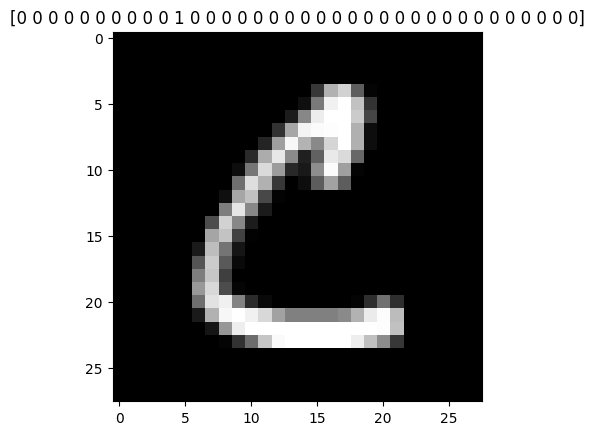

In [47]:
# Check data with label binarizer's label
plt.imshow(data[30000].reshape(28,28), cmap='gray')
plt.title(str(labels[0]))

Kode `plt.imshow(data[30000].reshape(28,28), cmap='gray')` digunakan untuk menampilkan gambar yang terletak pada indeks 30000 dari data. Kemudian `plt.title(str(labels[0]))` digunakan untuk menampilkan label yang terkait dengan gambar pertama dalam data (pada indeks 0).



In [48]:
# Since our data is not balance, we will handle it by giving weight for 'small' data

# Check number of data for each labels first
classes_total = labels.sum(axis = 0)
classes_total

array([ 6903,  7877,  6990,  7141,  6824,  6313,  6876,  7293,  6825,
        6958, 13869,  8668, 23409, 10134, 11440,  1163,  5762,  7218,
        1120,  8493,  5603, 11586, 12336, 19010, 57825, 19341,  5812,
       11566, 48419, 22495, 29008,  4182, 10784,  6272, 10859,  6076])

Kode `labels.sum(axis=0)` digunakan untuk menghitung jumlah sampel data yang terdapat dalam setiap kelas (label) dalam dataset setelah dilakukan one-hot encoding.



In [49]:
# Check the biggest value of data
classes_total.max()

57825

Perintah `classes_total.max()` digunakan untuk menemukan nilai maksimum dari jumlah sampel data yang ada dalam satu kelas tertentu setelah dilakukan one-hot encoding.



In [50]:
# Create a weight for each data
classes_weights = {}
for i in range(0, len(classes_total)):
  #print(i)
  classes_weights[i] = classes_total.max() / classes_total[i]

# Check the weight for each data
classes_weights

{0: 8.376792698826597,
 1: 7.340992763742541,
 2: 8.272532188841202,
 3: 8.097605377398123,
 4: 8.473769050410317,
 5: 9.15967052114684,
 6: 8.409685863874346,
 7: 7.928835870012341,
 8: 8.472527472527473,
 9: 8.310577752227651,
 10: 4.169370538611291,
 11: 6.671089063221043,
 12: 2.4702037677816224,
 13: 5.7060390763765545,
 14: 5.0546328671328675,
 15: 49.72055030094583,
 16: 10.035577924331829,
 17: 8.011221945137157,
 18: 51.629464285714285,
 19: 6.808548216178029,
 20: 10.320364090665715,
 21: 4.990937338166753,
 22: 4.6875,
 23: 3.0418200946870066,
 24: 1.0,
 25: 2.989762680316426,
 26: 9.94924294562973,
 27: 4.999567698426422,
 28: 1.1942625828703608,
 29: 2.5705712380529007,
 30: 1.993415609487038,
 31: 13.827116212338593,
 32: 5.362110534124629,
 33: 9.21954719387755,
 34: 5.3250759738465785,
 35: 9.51695194206715}

Kode ini bertujuan untuk membuat bobot (weight) untuk setiap kelas (label) dalam dataset. Bobot ini akan digunakan untuk menangani ketidakseimbangan dalam jumlah sampel data antar kelas.

- `classes_weights = {}`: Inisialisasi kamus (dictionary) kosong untuk menyimpan bobot setiap kelas.
- `for i in range(0, len(classes_total)):`: Looping melalui setiap kelas.
- `classes_weights[i] = classes_total.max() / classes_total[i]`: Menghitung bobot untuk setiap kelas dengan rumus: bobot kelas = jumlah sampel maksimum / jumlah sampel dalam kelas tersebut. Bobot ini dimaksudkan untuk memberikan penekanan lebih pada kelas yang memiliki jumlah sampel yang lebih sedikit.



## Split Data to Train and Test

In [51]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state = 1, stratify = labels)

Kode ini menggunakan fungsi `train_test_split` dari `sklearn.model_selection` untuk membagi dataset menjadi data latih (`X_train` dan `y_train`) serta data uji (`X_test` dan `y_test`) dengan proporsi 80% data untuk pelatihan dan 20% untuk pengujian.

- `data` adalah dataset yang berisi gambar-gambar yang telah diproses sebelumnya.
- `labels` adalah label-label yang sesuai dengan setiap gambar dalam dataset.

Argumen `test_size=0.2` menandakan bahwa 20% dari keseluruhan data akan dialokasikan untuk data uji (`X_test` dan `y_test`), sedangkan 80% akan digunakan sebagai data latih (`X_train` dan `y_train`).

Argumen `stratify=labels` digunakan untuk memastikan bahwa pembagian data uji dan data latih akan mempertahankan proporsi kelas yang sama seperti dalam dataset aslinya, yang bermanfaat dalam menangani ketidakseimbangan kelas.

Selain itu, `random_state=1` menetapkan titik awal untuk generator angka acak untuk memastikan hasil pembagian data akan konsisten setiap kali kode ini dijalankan.

## Create Data Augmentation

In [52]:
# Import library
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Ini adalah perintah untuk mengimpor kelas `ImageDataGenerator` dari modul `tensorflow.keras.preprocessing.image`. `ImageDataGenerator` adalah sebuah alat yang kuat untuk mempersiapkan data gambar agar siap untuk proses pelatihan model neural network dalam TensorFlow.

Kelas ini memungkinkan untuk melakukan augmentasi data secara real-time saat model sedang dilatih. Augmentasi data adalah teknik yang digunakan untuk meningkatkan variasi dan jumlah sampel dalam dataset dengan melakukan transformasi pada gambar-gambar yang ada, seperti rotasi, pergeseran, pembalikan, dan lainnya. Hal ini membantu dalam meningkatkan keakuratan dan generalisasi model.

In [53]:
augmentation = ImageDataGenerator(rotation_range = 10, zoom_range=0.05, width_shift_range=0.1,
                                  height_shift_range=0.1, horizontal_flip = False)

Kode ini menggunakan `ImageDataGenerator` dari TensorFlow untuk membuat objek `augmentation`. Objek ini digunakan untuk melakukan augmentasi data pada gambar-gambar yang akan digunakan saat proses pelatihan model.

- `rotation_range=10`: Menerapkan rotasi pada gambar dalam rentang 10 derajat.
- `zoom_range=0.05`: Melakukan zoom in/out secara acak hingga sebesar 5%.
- `width_shift_range=0.1` dan `height_shift_range=0.1`: Menggeser gambar horizontal atau vertikal secara acak hingga sebesar 10% dari lebar atau tinggi gambar.
- `horizontal_flip=False`: Tidak melakukan pembalikan horizontal pada gambar.

Ini adalah beberapa transformasi yang diterapkan pada gambar-gambar dalam dataset saat proses augmentasi data untuk menambah variasi dan keberagaman pada data yang digunakan dalam pelatihan model. Jika `horizontal_flip` diatur menjadi `True`, itu akan melakukan pembalikan horizontal juga.

## Build CNN Model

In [54]:
# Import library
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint

Ini adalah perintah untuk mengimpor beberapa kelas yang diperlukan dari TensorFlow untuk membangun dan melatih model neural network menggunakan library Keras yang terintegrasi dalam TensorFlow.

- `Sequential`: Untuk membuat model neural network secara berurutan, satu lapisan setelah yang lain.
- `Conv2D`: Lapisan konvolusi yang digunakan untuk mengekstraksi fitur-fitur dari gambar.
- `MaxPool2D`: Lapisan pemadatan yang digunakan untuk mereduksi dimensi fitur yang diekstraksi oleh lapisan konvolusi.
- `Flatten`: Lapisan yang digunakan untuk meratakan output dari lapisan sebelumnya menjadi vektor satu dimensi.
- `Dense`: Lapisan yang terdiri dari neuron-neuron yang terhubung secara penuh, biasanya digunakan sebagai lapisan terakhir untuk klasifikasi.
- `ModelCheckpoint`: Untuk menyimpan model ke disk selama pelatihan, biasanya model dengan performa terbaik selama pelatihan.



In [55]:
# Build the network
network = Sequential()

network.add(Conv2D(filters = 32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Conv2D(filters = 64, kernel_size=(3,3), activation='relu', padding='same'))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Conv2D(filters = 128, kernel_size=(3,3), activation='relu', padding='valid'))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Flatten())

network.add(Dense(64, activation = 'relu'))
network.add(Dense(128, activation = 'relu'))

network.add(Dense(36, activation='softmax'))

network.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

Kode ini mendefinisikan arsitektur sebuah Convolutional Neural Network (CNN) dengan menggunakan Sequential API dari TensorFlow. Struktur jaringan ini terdiri dari beberapa lapisan yang berbeda:

- Tiga lapisan konvolusi (`Conv2D`) dengan jumlah filter berturut-turut 32, 64, dan 128. Setiap lapisan menerapkan konvolusi pada gambar dengan ukuran kernel 3x3, menggunakan fungsi aktivasi ReLU, dan diikuti oleh lapisan pemadatan (`MaxPool2D`) dengan ukuran pooling 2x2 untuk mereduksi dimensi fitur.
- Lapisan pemadatan (`Flatten`) untuk meratakan fitur-fitur yang dihasilkan dari lapisan konvolusi menjadi vektor satu dimensi.
- Dua lapisan tersembunyi yang terdiri dari 64 dan 128 neuron dengan fungsi aktivasi ReLU.
- Lapisan output dengan 36 neuron (sesuai dengan jumlah kelas yang direpresentasikan setelah penggabungan label digit dan alfabet), menggunakan fungsi aktivasi softmax untuk klasifikasi multi-kelas.

Selanjutnya, jaringan ini dikompilasi menggunakan fungsi kerugian `categorical_crossentropy` (karena masalah klasifikasi multi-kelas) dan optimizer 'adam' untuk melatih model. Metrik yang dipantau adalah akurasi (`accuracy`) dalam proses pelatihan.

In [56]:
# Check network summary
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

Perintah `network.summary()` digunakan untuk menampilkan ringkasan dari arsitektur model neural network yang telah didefinisikan.

Ringkasan ini mencakup informasi tentang setiap lapisan dalam model, jumlah parameter yang diperlukan, ukuran keluaran dari setiap lapisan, serta jumlah parameter yang dapat diubah atau disesuaikan selama proses pelatihan.

Dengan menjalankan `network.summary()`, maka akan mendapatkan tampilan yang memuat informasi rinci tentang struktur dan ukuran model CNN yang telah Anda buat. Ini akan membantu memahami bagaimana setiap lapisan berinteraksi dan jumlah parameter yang perlu disesuaikan selama pelatihan.

In [57]:
# Create actual labels
name_labels = '0123456789'
name_labels += 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
name_labels = [l for l in name_labels]

# Check actual label
print(name_labels)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


`name_labels` yang label-label aktual yang terdiri dari angka 0-9 diikuti oleh huruf-huruf A-Z dalam urutan yang sesuai. Daftar ini nantinya dapat digunakan sebagai referensi untuk menafsirkan hasil prediksi dari model, di mana setiap indeks dalam daftar ini mewakili satu kelas dalam dataset yang sedang diproses.

## Train model

In [58]:
# Set model name, epoch, and batch size
file_model = 'custom_ocr.model'
epochs = 20
batch_size = 128

- `file_model` adalah nama yang diberikan untuk menyimpan model setelah pelatihan.
- `epochs` menentukan jumlah iterasi atau epoch yang akan dilakukan selama proses pelatihan model.
- `batch_size` menentukan jumlah sampel yang akan digunakan untuk melatih model dalam satu iterasi.

Nilai-nilai ini akan digunakan dalam proses pelatihan model untuk menentukan berapa kali seluruh dataset akan dipelajari oleh model (`epochs`) dan berapa banyak sampel yang akan digunakan dalam satu iterasi pembaruan bobot model (`batch_size`).

In [59]:
# Setup checkpoint
checkpointer = ModelCheckpoint(file_model, monitor = 'val_loss', verbose = 1, save_best_only=True)

Kode tersebut menggunakan `ModelCheckpoint` dari Keras untuk menyimpan model selama pelatihan berdasarkan performa terbaik pada data validasi, dengan memantau val_loss dan menyimpan model dengan nilai loss terendah.

In [60]:
# Fit the model
history = network.fit(augmentation.flow(X_train, y_train, batch_size=batch_size),
                      validation_data = (X_test, y_test),
                      steps_per_epoch = len(X_train) // batch_size, epochs=epochs,
                      class_weight = classes_weights, verbose=1, callbacks=[checkpointer])

Epoch 1/20
2765/2765 [==============================] - ETA: 0s - loss: 2.2491 - accuracy: 0.8203
Epoch 1: val_loss improved from inf to 0.28480, saving model to custom_ocr.model
2765/2765 [==============================] - 151s 50ms/step - loss: 2.2491 - accuracy: 0.8203 - val_loss: 0.2848 - val_accuracy: 0.8902
Epoch 2/20
2765/2765 [==============================] - ETA: 0s - loss: 1.0060 - accuracy: 0.8981
Epoch 2: val_loss improved from 0.28480 to 0.25511, saving model to custom_ocr.model
2765/2765 [==============================] - 151s 55ms/step - loss: 1.0060 - accuracy: 0.8981 - val_loss: 0.2551 - val_accuracy: 0.8939
Epoch 3/20
2765/2765 [==============================] - ETA: 0s - loss: 0.8332 - accuracy: 0.9115
Epoch 3: val_loss improved from 0.25511 to 0.23404, saving model to custom_ocr.model
2765/2765 [==============================] - 142s 51ms/step - loss: 0.8332 - accuracy: 0.9115 - val_loss: 0.2340 - val_accuracy: 0.9060
Epoch 4/20
2764/2765 [=========================

Proses ini melatih model dengan data yang telah di-augmentasi, mengevaluasi performanya pada data validasi, dan menyimpan model terbaik selama pelatihan menggunakan callback `ModelCheckpoint`. Informasi pelatihan tersimpan dalam variabel `history`.

## Evaluate Model

### Make a Single Prediction

In [61]:
# make a prediction
predictions = network.predict(X_test, batch_size=batch_size)

692/692 [==============================] - 2s 3ms/step


Prediksi dibuat pada data uji (`X_test`) menggunakan model yang telah dilatih.

In [62]:
# Check prediction for data-0
# You will get the probability for each label
# The highest one is the prediction
predictions[1]

array([9.18374496e-20, 1.83995597e-14, 3.01520310e-13, 2.23346742e-21,
       8.42419083e-22, 1.24402628e-15, 1.18469381e-20, 5.45454225e-16,
       5.25340339e-19, 8.85542688e-22, 1.87490495e-17, 1.24314214e-18,
       3.20613490e-14, 6.50219852e-12, 3.30429316e-19, 3.31194415e-17,
       1.05440796e-13, 1.84387553e-15, 9.99999881e-01, 1.12910762e-07,
       2.36749176e-16, 4.39857325e-13, 4.27303139e-23, 1.45625650e-16,
       1.43354414e-14, 1.88704647e-16, 3.50736091e-22, 1.77062622e-18,
       1.27912603e-16, 3.46257523e-10, 1.54238957e-14, 9.49992912e-17,
       2.39189821e-19, 5.49103719e-15, 8.85261132e-17, 8.39451252e-12],
      dtype=float32)

Kode `predictions[1]` digunakan untuk melihat hasil prediksi probabilitas dari model untuk sampel data pertama dalam data uji (`X_test`).



In [63]:
# Get the actual prediction -> highest probability
np.argmax(predictions[1])

18

Kode `np.argmax(predictions[1])` digunakan untuk menemukan indeks label dengan probabilitas tertinggi yang dihasilkan oleh model untuk sampel data pertama dalam data uji (`X_test`).



In [64]:
# Check label for 24
name_labels[18]

'I'


Kode ini akan mengembalikan label yang sesuai dengan indeks 18 dalam daftar label `name_labels`. Dalam hal ini, indeks 18 mengacu pada label yang sesuai dengan nilai 24 dalam klasifikasi huruf A-Z yang telah ditambahkan sebelumnya ke dalam `name_labels`.

In [65]:
# Check y_test label for 0
y_test[1]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


Kode ini akan mengembalikan label yang sesuai dengan sampel data pertama dalam data uji, memberikan informasi tentang label sebenarnya dari sampel data tersebut dalam format one-hot encoded.

In [66]:
# check the highest value
np.argmax(y_test[1])

18

Kode `np.argmax(y_test[1])` digunakan untuk menemukan indeks dari nilai tertinggi dalam label yang sesuai dengan sampel data pertama dalam data uji (`X_test`).



In [67]:
# Check the label of y_test 0
name_labels[np.argmax(y_test[18])]

'S'

Kode `name_labels[np.argmax(y_test[18])]` digunakan untuk menemukan label yang sesuai dengan nilai tertinggi dalam label yang merepresentasikan sampel data ke-18 dalam data uji (`y_test`).



## Make an Evaluation on Test Data

In [68]:
# Evaluate on test data
network.evaluate(X_test, y_test)

2766/2766 [==============================] - 9s 3ms/step - loss: 0.1472 - accuracy: 0.9466


[0.14722493290901184, 0.9465815424919128]

Perintah `network.evaluate(X_test, y_test)` digunakan untuk mengevaluasi performa model pada data uji (`X_test`) dengan menggunakan label sebenarnya (`y_test`).



In [ ]:
# Print Classification Report
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1), target_names = name_labels))

Pernyataan kode tersebut mencetak laporan klasifikasi menggunakan fungsi `classification_report`. Laporan ini memberikan evaluasi kinerja model klasifikasi dengan membandingkan prediksi model dengan nilai sebenarnya dalam data pengujian.

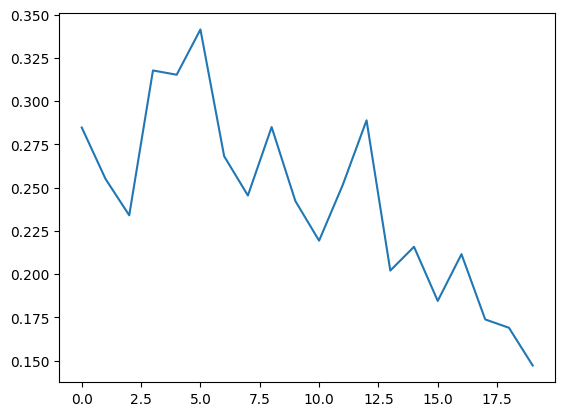

In [70]:
# Visualize loss value for each epoch
plt.plot(history.history['val_loss'])

Pernyataan kode ini menggunakan `matplotlib` untuk membuat grafik perubahan nilai loss pada set validasi selama pelatihan model, membantu visualisasi kinerja model pada set validasi sepanjang epoch.

In [71]:
# You can also check the another metrics
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Pernyataan kode ini digunakan untuk mengecek kunci (keys) yang tersedia dalam objek `history.history`. Kunci-kunci tersebut memberikan informasi tentang metrik-metrik yang tercatat selama pelatihan model.

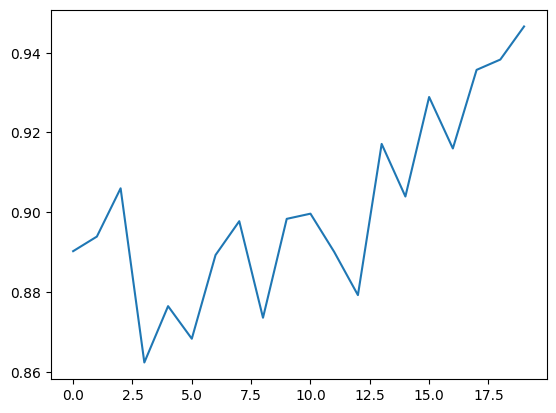

In [72]:
# Check the model performance by validation accuracy
plt.plot(history.history['val_accuracy'])

Pernyataan kode ini menggunakan `matplotlib` untuk membuat grafik perubahan nilai akurasi pada set validasi selama pelatihan model. Grafik ini memberikan gambaran tentang bagaimana akurasi model berkembang sepanjang epoch pada data validasi.


## Save The Model

In [73]:
# The result will show in colab directory
network.save('network', save_format= 'h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Pernyataan ini menyimpan model neural network dengan nama 'network' dalam format H5 di direktori Colab. File 'network.h5' akan tersimpan dan dapat digunakan kembali di sesi Colab berikutnya atau di luar platform Colab.

## Testing on Real Image

In [74]:
# Import library
from tensorflow.keras.models import load_model

Pernyataan ini mengimpor fungsi `load_model` dari pustaka TensorFlow untuk memuat model neural network yang telah disimpan sebelumnya. Fungsi ini dapat digunakan untuk mengembalikan model dari file yang disimpan, seperti 'network.h5' dalam contoh sebelumnya.

In [75]:
# Load saved network
load_network = load_model('network')

Pernyataan ini menggunakan fungsi `load_model` untuk memuat kembali model neural network yang telah disimpan sebelumnya dengan nama 'network'. Hasilnya, model tersebut kini disimpan dalam variabel `load_network` dan dapat digunakan untuk membuat prediksi atau melanjutkan pelatihan, tergantung pada kebutuhan.

In [ ]:
# Check summary
load_network.summary()

Pernyataan ini menggunakan metode `summary()` untuk menampilkan ringkasan (summary) dari model neural network yang telah dimuat kembali (`load_network`). Ringkasan model mencakup informasi tentang arsitektur model, jumlah parameter, dan struktur layer. Ini berguna untuk mendapatkan wawasan cepat tentang model yang dimuat.

In [79]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


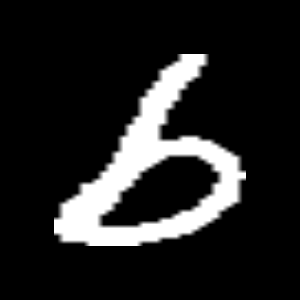

In [80]:
# Load Image
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/drive/MyDrive/data/b_small.png')
cv2_imshow(img)

Pernyataan kode ini dilakukan di dalam lingkungan Google Colab dan digunakan untuk memuat dan menampilkan gambar. Berikut penjelasan singkat:

1. **Import Libraries**:
   - `cv2`: Library OpenCV untuk pengolahan gambar.
   - `cv2_imshow` dari `google.colab.patches`: Fungsi khusus Colab untuk menampilkan gambar.

2. **Load Image**:
   - `img = cv2.imread('/content/drive/MyDrive/data/b_small.png')`: Membaca gambar dari path tertentu di Google Drive. Gambar ini kemudian disimpan dalam variabel `img`.

3. **Display Image**:
   - `cv2_imshow(img)`: Menampilkan gambar menggunakan fungsi khusus Colab `cv2_imshow`.



In [81]:
# Check shape
img.shape

(300, 300, 3)

Pernyataan ini digunakan untuk memeriksa dimensi atau bentuk (shape) dari gambar yang telah dimuat (`img`). Hasilnya adalah tuple yang menyatakan tinggi (height), lebar (width), dan jumlah saluran warna (channels) pada gambar. Misalnya, jika hasilnya adalah `(height, width, channels)`, maka gambar tersebut memiliki tinggi sebesar `height` pixel, lebar sebesar `width` pixel, dan `channels` menyatakan jumlah saluran warna (misalnya, 3 untuk warna RGB).

In [82]:
# Convert to gray
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# check shape
gray_img.shape

(300, 300)

Pernyataan kode ini mengubah gambar warna (`img`) menjadi skala abu-abu (grayscale) menggunakan fungsi `cv2.cvtColor`. Selanjutnya, pernyataan `gray_img.shape` digunakan untuk memeriksa dimensi atau bentuk (shape) dari gambar skala abu-abu yang baru.

- **`cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)`**: Mengubah gambar warna (`img`) menjadi gambar skala abu-abu.

- **`gray_img.shape`**: Memeriksa dimensi atau bentuk (shape) dari gambar skala abu-abu yang baru. Hasilnya adalah tuple yang menyatakan tinggi (height) dan lebar (width) dari gambar skala abu-abu. Gambar skala abu-abu hanya memiliki satu saluran warna.

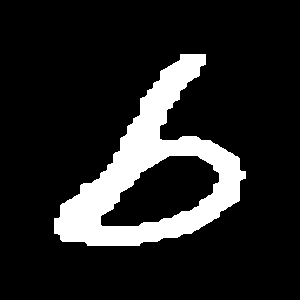

120.0


In [83]:
# Pre-process
# Binary Threshold and Otsu
value, thresh = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

cv2_imshow(thresh)

# print threshold value
print(value)

Pernyataan kode ini melakukan pra-pemrosesan pada gambar skala abu-abu (`gray_img`) dengan menggunakan teknik binary thresholding dan metode Otsu. Berikut adalah penjelasan singkat:

- **Binary Thresholding with Otsu**:
  - `cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)`: Menerapkan binary thresholding pada gambar skala abu-abu menggunakan metode Otsu. Hasilnya adalah gambar biner di mana piksel yang melebihi nilai ambang (threshold) akan diatur menjadi 255 (putih), sementara yang di bawah ambang akan diatur menjadi 0 (hitam). Nilai ambangnya dihitung secara otomatis dengan metode Otsu.
  
- **Menampilkan Gambar Hasil Thresholding**:
  - `cv2_imshow(thresh)`: Menampilkan gambar hasil thresholding.

- **Print Threshold Value**:
  - `print(value)`: Mencetak nilai ambang (threshold) yang dihitung oleh metode Otsu.

Pra-pemrosesan ini umumnya digunakan untuk mempersiapkan gambar sebelum diolah lebih lanjut, seperti pengenalan objek atau karakter pada gambar.

In [84]:
# Resize image in order to match network input shape -> 28*28
img_resize = cv2.resize(gray_img, (28,28))
cv2_imshow(img_resize)

Pernyataan kode ini mengubah ukuran gambar skala abu-abu (`gray_img`) menjadi 28x28 piksel menggunakan fungsi `cv2.resize`. Hal ini dilakukan untuk menyesuaikan ukuran gambar dengan bentuk input yang diharapkan oleh jaringan neural (28x28), misalnya, pada tugas pengenalan gambar atau pengolahan citra.

- **`cv2.resize(gray_img, (28, 28))`**: Mengubah ukuran gambar skala abu-abu menjadi 28x28 piksel.

- **`cv2_imshow(img_resize)`**: Menampilkan gambar yang telah diubah ukurannya.

Langkah ini berguna jika model yang digunakan untuk tugas tertentu membutuhkan input dengan ukuran tertentu, dan gambar yang diberikan perlu disesuaikan sebelum diproses lebih lanjut.

In [85]:
# Convert to float 32
# and extend the dimension since network input shape is 28*28*1
img_input = img_resize.astype('float32') / 255 # also perform normalization
img_input = np.expand_dims(img_input, axis=-1) # insert depth

# check shape
img_input.shape

(28, 28, 1)

Pernyataan kode ini melakukan dua tahap pra-pemrosesan pada gambar yang telah diubah ukurannya (`img_resize`):

1. **Convert to Float32 and Normalize**:
   - `img_input = img_resize.astype('float32') / 255`: Mengonversi tipe data gambar menjadi float32 dan melakukan normalisasi dengan membagi setiap nilai piksel oleh 255. Normalisasi biasanya dilakukan untuk memastikan nilai piksel berada dalam rentang 0 hingga 1, mempermudah pelatihan model.

2. **Expand Dimension**:
   - `img_input = np.expand_dims(img_input, axis=-1)`: Menambahkan dimensi ke-3 pada akhir array gambar untuk sesuai dengan bentuk input yang diharapkan oleh jaringan neural (28x28x1). Jumlah saluran (depth) adalah 1 karena gambar tersebut telah diubah menjadi skala abu-abu.

- **`img_input.shape`**: Memeriksa bentuk (shape) dari gambar setelah dilakukan pra-pemrosesan. Hasilnya adalah tuple yang menyatakan tinggi (height), lebar (width), dan jumlah saluran (depth) dari gambar.

Langkah-langkah ini sering diperlukan untuk mempersiapkan data input sebelum memberikannya ke model, terutama jika model memiliki persyaratan khusus terkait tipe data atau bentuk input.

In [86]:
# Add "amount of data" as dimension
img_input = np.reshape(img_input, (1,28,28,1))
img_input.shape

(1, 28, 28, 1)

Pernyataan kode ini menggunakan `np.reshape` untuk menambahkan dimensi tambahan ke gambar yang telah diproses (`img_input`). Hasilnya adalah gambar dengan dimensi tambahan yang menyatakan "jumlah data" atau batch size.

- **`img_input = np.reshape(img_input, (1, 28, 28, 1))`**: Menambahkan dimensi baru ke gambar, menjadikannya memiliki bentuk (shape) (1, 28, 28, 1). Ini menunjukkan bahwa kita memiliki satu data (batch size 1) dengan ukuran gambar 28x28 dan satu saluran warna.

- **`img_input.shape`**: Memeriksa bentuk (shape) dari gambar setelah penambahan dimensi. Hasilnya adalah tuple yang menyatakan jumlah data, tinggi (height), lebar (width), dan jumlah saluran (depth) dari gambar.

Tambahnya dimensi batch umumnya diperlukan saat memasukkan data ke dalam model neural network, karena sebagian besar model memproses data dalam bentuk batch untuk efisiensi komputasi.

In [87]:
# Make a predition
prediction = load_network.predict(img_input)
pred_label = np.argmax(prediction) # predict actual label
pred_label

1/1 [==============================] - 0s 162ms/step


6

Pernyataan kode ini menggunakan model untuk membuat prediksi terhadap gambar yang telah diolah, dan kemudian mengambil label prediksi dengan probabilitas tertinggi. Hasilnya adalah label kelas yang diprediksi oleh model.

In [88]:
# check label for 6
name_labels[6]

'6'

Pernyataan kode ini mengakses label yang sesuai dengan indeks 6 dari array `name_labels`. Ini membantu untuk mengetahui interpretasi label kelas apa yang sesuai dengan output prediksi model untuk kelas dengan indeks 6.